# Analysis of Solar System Moons
The data for this assignment is a list of the recognized moons of the planets and of the largest potential dwarf
planets of the Solar System. Data is available at: https://en.wikipedia.org/wiki/List_of_natural_satellites#List

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# we can import the data using Pandas. Use pd.read_html() to read in the table. Used the "match" parameter to find only the table we are interested in.
link_moon = pd.read_html('https://en.wikipedia.org/wiki/List_of_natural_satellites', match = 'Image')

#Extracting the table of our interest
moon_table = link_moon[0]

#Displaying first 10 rows of the dataframe
moon_table.head(10)

,Image,Parent,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17]
5,NaN,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean),[16][17]
6,NaN,Jupiter,IV (4),Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean),[16][17]
7,NaN,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea),[15][16][18]
8,NaN,Jupiter,VI (6),Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia),[15][16][20]
9,NaN,Jupiter,VII (7),Elara,43,11741000,259.64,1905,Perrine,Prograde irregular (Himalia),[15][16][21]


# 2 Data Cleaning Tasks:

#### Rename/name the columns.


In [2]:
moon_table.rename(columns = {"Numeral" : "Numeric", "Name":"Name of moon", "Discovery year" : "Year of Discovery"})

,Image,Parent,Numeric,Name of moon,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Year of Discovery,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17]
5,NaN,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean),[16][17]
6,NaN,Jupiter,IV (4),Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean),[16][17]
7,NaN,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea),[15][16][18]
8,NaN,Jupiter,VI (6),Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia),[15][16][20]
9,NaN,Jupiter,VII (7),Elara,43,11741000,259.64,1905,Perrine,Prograde irregular (Himalia),[15][16][21]


#### Reorder the columns in a way that makes the table easy to read/understand.
##### Since we are analyzing moons of the planet, it makes sense to arrange the table with name of the planet first, then its moon's name, and its associated demographic details.

In [3]:
#Reordering the columns to make it more readable
reordered_table = moon_table[["Numeral","Parent", "Name" , "Mean radius (km)", "Semi-major axis (km)", "Sidereal period (d) (r = retrograde)", "Discovery year", "Discovered by","Notes", "Ref(s)", "Image"]]
reordered_table

,Numeral,Parent,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s),Image
0,I (1),Earth,Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13],NaN
1,I (1),Mars,Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16],NaN
2,II (2),Mars,Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16],NaN
3,I (1),Jupiter,Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
4,II (2),Jupiter,Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
5,III (3),Jupiter,Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
6,IV (4),Jupiter,Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
7,V (5),Jupiter,Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea),[15][16][18],NaN
8,VI (6),Jupiter,Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia),[15][16][20],NaN
9,VII (7),Jupiter,Elara,43,11741000,259.64,1905,Perrine,Prograde irregular (Himalia),[15][16][21],NaN


In [4]:
#setting the index as parent planet
indexed_table=reordered_table.set_index('Parent')
indexed_table.head(10)

,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s),Image
Parent,,,,,,,,,,
Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13],NaN
Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16],NaN
Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16],NaN
Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,IV (4),Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,V (5),Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea),[15][16][18],NaN
Jupiter,VI (6),Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia),[15][16][20],NaN


# Data cleaning: 
we are adding more precision to Sidereal period column 

We are cleaning the mean radius column and semi major axis by removing the digits after "±". It makes it easier to deal with values and omitting the plus minus range is helpful.

We are converting the data types of columns, to type numeric, so they are in the same numeric format. 

In [5]:
# Cleaning the Sidereal period column, adding more precision to the values. 
indexed_table['Sidereal period (d) (r = retrograde)'] = indexed_table['Sidereal period (d) (r = retrograde)'].str.replace(r'[^\d.]+', '')

#Cleaning the Mean Radius column
indexed_table['Mean radius (km)'] = indexed_table['Mean radius (km)'].apply(lambda x : x.split('±')[0])
indexed_table['Mean radius (km)'] = indexed_table['Mean radius (km)'].str.replace(r'~', '')

#Cleaning Semi Major Axis
indexed_table['Semi-major axis (km)'] = indexed_table['Semi-major axis (km)'].apply(lambda x : x.split('±')[0])
indexed_table['Semi-major axis (km)'] = indexed_table['Semi-major axis (km)'].str.replace(r'~', '')

#Converting the Data Types of the cleaned columns
indexed_table["Sidereal period (d) (r = retrograde)"] = pd.to_numeric(indexed_table["Sidereal period (d) (r = retrograde)"], errors = 'coerce')
indexed_table["Semi-major axis (km)"] = pd.to_numeric(indexed_table["Semi-major axis (km)"], errors = 'coerce')
indexed_table["Mean radius (km)"] = pd.to_numeric(indexed_table["Mean radius (km)"], errors = 'coerce')

indexed_table

,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s),Image
Parent,,,,,,,,,,
Earth,I (1),Moon,1737.1,384399.0,27.321582,Prehistoric,—,Synchronous rotation,[13],NaN
Mars,I (1),Phobos,11.1,9380.0,0.319000,1877,Hall,NaN,[14][15][16],NaN
Mars,II (2),Deimos,6.2,23460.0,1.262000,1877,Hall,NaN,[14][15][16],NaN
Jupiter,I (1),Io,NaN,421800.0,1.769000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,II (2),Europa,1560.7,671100.0,3.551000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,III (3),Ganymede,NaN,1070400.0,7.155000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,IV (4),Callisto,NaN,1882700.0,16.690000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN
Jupiter,V (5),Amalthea,83.5,181400.0,0.498000,1892,Barnard,Inner moon (Amalthea),[15][16][18],NaN
Jupiter,VI (6),Himalia,67.0,11461000.0,250.560000,1904,Perrine,Prograde irregular (Himalia),[15][16][20],NaN


# Analysis of data: 

# Research Questions:
##### 1) What is the largest moon. Also, calculate the increase in the size of moons over the average size. 
##### 2) Who discovered the maximum number of moons? 
##### 3) Which planet in the table has the maximum number of moons?



In [6]:
print('Displaying the record for satellite that has highest Mean radius in (km)')
display(indexed_table[indexed_table["Mean radius (km)"] == indexed_table["Mean radius (km)"].max()])
#calculating the average of mean radius
avg_radius = indexed_table["Mean radius (km)"].mean()

#Filling in NaN with 0
indexed_table.fillna(0)

#Creating a new column to store data about its difference as compared to the average radius of all heavenly bodies 
indexed_table["Exceeding radius over average"] = indexed_table["Mean radius (km)"]  - avg_radius 
print("The increase in the size of moons over the average size")
display(indexed_table)

Displaying the record for satellite that has highest Mean radius in (km)


,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s),Image
Parent,,,,,,,,,,
Earth,I (1),Moon,1737.1,384399.0,27.321582,Prehistoric,—,Synchronous rotation,[13],NaN


The increase in the size of moons over the average size


,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s),Image,Exceeding radius over average
Parent,,,,,,,,,,,
Earth,I (1),Moon,1737.1,384399.0,27.321582,Prehistoric,—,Synchronous rotation,[13],NaN,1670.994695
Mars,I (1),Phobos,11.1,9380.0,0.319000,1877,Hall,NaN,[14][15][16],NaN,-55.005305
Mars,II (2),Deimos,6.2,23460.0,1.262000,1877,Hall,NaN,[14][15][16],NaN,-59.905305
Jupiter,I (1),Io,NaN,421800.0,1.769000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN,NaN
Jupiter,II (2),Europa,1560.7,671100.0,3.551000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN,1494.594695
Jupiter,III (3),Ganymede,NaN,1070400.0,7.155000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN,NaN
Jupiter,IV (4),Callisto,NaN,1882700.0,16.690000,1610,Galileo,Main-group moon (Galilean),[16][17],NaN,NaN
Jupiter,V (5),Amalthea,83.5,181400.0,0.498000,1892,Barnard,Inner moon (Amalthea),[15][16][18],NaN,17.394695
Jupiter,VI (6),Himalia,67.0,11461000.0,250.560000,1904,Perrine,Prograde irregular (Himalia),[15][16][20],NaN,0.894695


In [7]:
#grouping the data by parent and counting the number of moons.
gk = indexed_table.groupby('Parent') 
gk.count()['Name']


Parent
Earth        1
Eris         1
Gonggong     1
Haumea       2
Jupiter     79
Makemake     1
Mars         2
Neptune     14
Orcus        1
Pluto        5
Quaoar       1
Salacia      1
Saturn      82
Uranus      27
Varda        1
Name: Name, dtype: int64

# Saturn has 82 moons followed by Jupiter


In [8]:
# Aggregating the data by discovered by column and counting the name of the moons discovered
gk = indexed_table.groupby('Discovered by') 
gk.count()['Name'].sort_values(ascending=False).head(5)

Discovered by
Sheppard, Jewitt, Kleyna                             39
Sheppard, Jewitt, Kleyna, Marsden                    18
Sheppard                                             14
Synnott (Voyager 2)                                  10
Sheppard, Jewitt, Fernández, Magnier, Dahm, Evans     9
Name: Name, dtype: int64

# Sheppard, Jewitt, Kleyna discovered the most number of moons


# Visualizing the data

<BarContainer object of 15 artists>

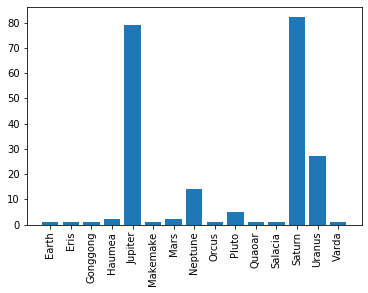

In [9]:
# Plotting the number of moons of each planet, as clearly seen from the bar plot below, we can see that saturn has the most moons
gk = indexed_table.groupby('Parent') 
count=gk.count()['Name']
plt.xticks(rotation=90)
plt.bar(count.index,count)

